In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
data = np.loadtxt('smoking.txt')
type(data)
import math
from __future__ import division
from scipy.stats import t

1a) Read the data from the file smoking.txt, and divide the dataset into two groups con- sisting of smokers and non-smokers. Write a script which computes the average lung function, measured in FEV1, among the smokers and among the non-smokers, using the template meanFEV1.py supplied on Absalon. Upload your code in the automatic code checking system.

b) Report your computed average FEV1 scores. Are you surprised?

In [2]:
# data is the datamatrix of the smoking dataset, e.g. as obtained by data = numpy.loadtxt('smoking.txt')
# should return a tuple containing average FEV1 of smokers and nonsmokers 
def meanFEV1(data):
    age = data[:,0]
    FEV1 = data[:,1]
    height = data[:,2]
    gender = data[:,3]
    smoking_status = data[:,4]
    weight = data[:,5]
    nonsmoker_indices = [i for i, n in enumerate(list(smoking_status)) if n == 0]
    smoker_indices = [i for i, n in enumerate(list(smoking_status)) if n == 1]
    nonsmoker = data[nonsmoker_indices,:]
    smoker = data[smoker_indices,:]
    avg_FEV1_nonsmoker = np.mean(nonsmoker[:,1])
    avg_FEV1_smoker = np.mean(smoker[:,1])
    return (avg_FEV1_nonsmoker, avg_FEV1_smoker)
    
pass

In [3]:
meanFEV1(data)

(2.5661426146010187, 3.2768615384615383)

Based on the supplied template hyptest.py, write a script that performs a two-sided t-test whose null hypothesis is that the two populations have the same mean. Use a significance level of α = 0.05, and return a binary response indicating acceptance or rejection of the null hypothesis. Please upload your code to the automatic code checker.


In [99]:
# data is the datamatrix of the smoking dataset, e.g. as obtained by data = numpy.loadtxt('smoking.txt')
# should return True if the null hypothesis is accepted and False otherwise
#WORKS USING TEXTBOOK STANDARD DEVIATION
def hyptest(data):
    age = data[:,0]
    FEV1 = data[:,1]
    height = data[:,2]
    gender = data[:,3]
    smoking_status = data[:,4]
    weight = data[:,5]
    nonsmoker_indices = [i for i, n in enumerate(list(smoking_status)) if n == 0]
    smoker_indices = [i for i, n in enumerate(list(smoking_status)) if n == 1]
    nonsmoker = data[nonsmoker_indices,:]
    smoker = data[smoker_indices,:]
    x = nonsmoker[:,1]
    y = smoker[:,1]
    
    #following part is from textbook:
    def dot(v, w):
        """v_1 * w_1 + ... + v_n * w_n"""
        return sum(v_i * w_i for v_i, w_i in zip(v, w))
    def sum_of_squares(v):
        """v_1 * v_1 + ... + v_n * v_n"""
        return dot(v, v)
    def de_mean(x):
        """translate x by subtracting its mean (so the result has mean 0)"""
        x_bar = np.mean(x)
        return [x_i - x_bar for x_i in x]
    def variance(x):
        """assumes x has at least two elements"""
        n = len(x)
        deviations = de_mean(x)
        return sum_of_squares(deviations) / (n - 1)
    def std_dv(x):
        return math.sqrt(variance(x))
    
    sx_sqr = std_dv(x)**2
    sy_sqr = std_dv(y)**2
    nx = len(x)
    ny = len(y)
    nx_sqr = nx**2
    ny_sqr = ny**2
    
    if std_dv(x) != 0 and std_dv(y) !=0:
        t_stats = ( np.mean(x) - np.mean(y) )/( np.sqrt((sx_sqr/nx)+(sy_sqr/ny)) )
        v = ( (sx_sqr/nx + sy_sqr/ny)**2 )/( (sx_sqr**2/(nx_sqr*(nx-1))) + ( sy_sqr**2/(ny_sqr*(ny-1))))

        p = 2*t.cdf(-abs(t_stats),v)
        print t_stats, v, p
        
        alpha = 0.05 #probability of falsely rejecting the null hypothesis
        if p <= alpha:
            return 1
        else:
            return 0
        
        #from solutions
        """t_top = smokers_mean_FEV1 - nonsmokers_mean_FEV1
        t_bottom = math.sqrt(smokers_std_FEV1**2/smokers_nu)
        t0 = t_top/t_bottom
        
        pval = 2*t.cdf(-math.fabs(t0), nu_floor)
        
        return pval < 0.05"""
        



In [100]:
from scipy import stats
smoking_status = data[:,4]
nonsmoker_indices = [i for i, n in enumerate(list(smoking_status)) if n == 0]
smoker_indices = [i for i, n in enumerate(list(smoking_status)) if n == 1]
nonsmoker = data[nonsmoker_indices,:]
smoker = data[smoker_indices,:]
x = nonsmoker[:,1]
y = smoker[:,1]
stats.ttest_ind(x,y,equal_var=False)

(-7.1496081295038083, 3.0738127448762341e-10)

In [101]:
hyptest(data)

-7.1496081295 83.273110251 3.07381274488e-10


1

Based on the template corr.py provided in Absalon, implement a function which takes two equal-length vectors as input and outputs their correlation, following Chapter 5 in the textbook [1]. Please upload your code to the automatic code checking system.

In [14]:
def corr(x,y):
    #following part is from textbook:
    def dot(v, w):
        """v_1 * w_1 + ... + v_n * w_n"""
        return sum(v_i * w_i for v_i, w_i in zip(v, w))
    def sum_of_squares(v):
        """v_1 * v_1 + ... + v_n * v_n"""
        return dot(v, v)
    def mean(x):
        return sum(x) / len(x)
    def de_mean(x):
        """translate x by subtracting its mean (so the result has mean 0)"""
        x_bar = mean(x)
        return [x_i - x_bar for x_i in x]
    def variance(x):
        """assumes x has at least two elements"""
        n = len(x)
        deviations = de_mean(x)
        return sum_of_squares(deviations) / (n - 1)
    def std_dv(x):
        return math.sqrt(variance(x))
    def covariance(x,y):
        n = len(x)
        return dot(de_mean(x), de_mean(y))/(n-1)
    
    stdev_x = std_dv(x)
    stdev_y = std_dv(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x,y)/stdev_x / stdev_y
    else:
        return 0

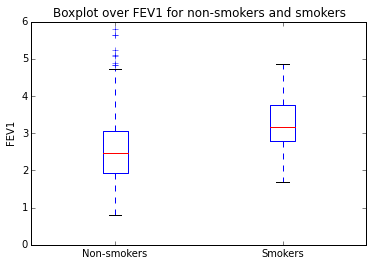

In [23]:
#2) Make a box plot of the FEV1 in the two groups. What do you see? Are you surprised?
labels = ['Non-smokers', 'Smokers']
plt.boxplot([nonsmoker[:,1],smoker[:,1]], labels = labels)
plt.title('Boxplot over FEV1 for non-smokers and smokers')
plt.ylabel('FEV1')

In [22]:
#4c) Compute the correlation between age and FEV1, and comment on it.
corr(age, FEV1)

0.75645898998959993

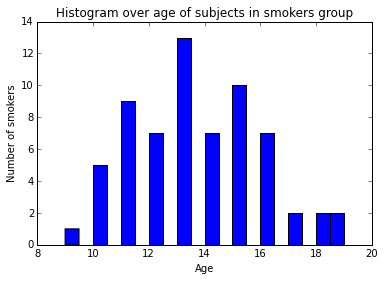

In [26]:
plt.hist(age_smoker, 20, label='Smokers')
plt.xlabel('Age')
plt.ylabel('Number of smokers')
plt.title('Histogram over age of subjects in smokers group')

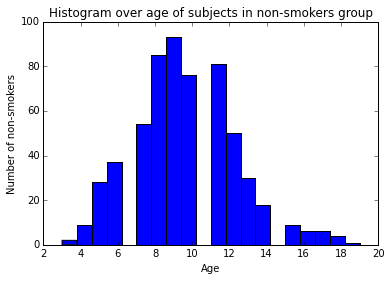

In [29]:
plt.hist(age_nonsmoker, 20, label='Non-smokers')
plt.xlabel('Age')
plt.ylabel('Number of non-smokers')
plt.title('Histogram over age of subjects in non-smokers group')